**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../config/config_sing.R")))
show_env()

You are in Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/out 
CODE DIRECTORY (FD_CODE): /data/reddylab/Kuei/code 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/code/Proj_CombEffect_ENCODE_FCC 
PATH OF RESULTS (FD_RES): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc 
PATH OF LOG     (FD_LOG): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc/log 


## Import data

In [2]:
### set file directories
fdiry = file.path(FD_RES, "results", "comparison")
fname = "result.ranknorm.starrmpra.tsv"
fpath = file.path(fdiry, fname)

### read data
dat = read_tsv(fpath)

### assign and show
dat_peak_log2fc = dat
print(dim(dat))
head(dat)

Rows: 5166 Columns: 10
── Column specification ───────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (6): Chrom, Peak, TMPRA_Gene, TMPRA_Dataset, CRISPR_HCFF, Assay
dbl (4): Start, End, Log2FC, RankNorm_Total

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 5166   10


Chrom,Start,End,Peak,TMPRA_Gene,TMPRA_Dataset,CRISPR_HCFF,Assay,Log2FC,RankNorm_Total
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
chr11,4539569,4540043,chr11_4539569_4540043,HBE1,OL45,"HBE1,HBG1,HBG2,HBS1L,MYB",ASTARR,0.14501695,0.6550523
chr11,4551336,4552012,chr11_4551336_4552012,HBE1,OL45,NA,ASTARR,0.32125162,0.7560976
chr11,4553969,4555012,chr11_4553969_4555012,HBE1,OL45,NA,ASTARR,0.14529397,0.6556330
chr11,4569016,4569992,chr11_4569016_4569992,HBE1,OL45,NA,ASTARR,0.01136464,0.5673635
chr11,4577444,4578031,chr11_4577444_4578031,HBE1,OL45,NA,ASTARR,0.24524353,0.7154472
chr11,4601808,4602487,chr11_4601808_4602487,HBE1,OL45,NA,ASTARR,-0.57215284,0.1277584


## Setup plot

In [32]:
CHROM = paste0("chr", c(1:22, "X"))
dat = dat_peak_log2fc
dat = dat %>% 
    dplyr::select(Chrom, TMPRA_Gene, TMPRA_Dataset) %>% 
    dplyr::distinct() %>%
    dplyr::mutate(Chrom = factor(Chrom, levels=CHROM)) %>%
    dplyr::arrange(Chrom)

gene = dat$TMPRA_Gene
print(gene)

dat

[1] "BCL11A" "MYC"    "HBE1"   "LMO2"   "FADS"   "HBA2"   "RBM38"  "GATA1" 


Chrom,TMPRA_Gene,TMPRA_Dataset
<fct>,<chr>,<chr>
chr2,BCL11A,OL45
chr8,MYC,OL43
chr11,HBE1,OL45
chr11,LMO2,OL45
chr11,FADS,OL13
chr16,HBA2,OL45
chr20,RBM38,OL45
chrX,GATA1,OL43


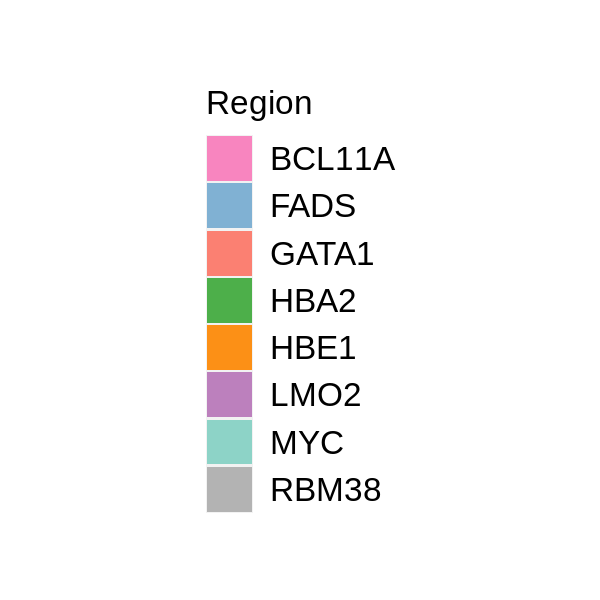

In [36]:
vec_color = c(
    "BCL11A" = "#f885bf", #"#fccde5",
    "MYC"    = "#8dd3c7",
    "HBE1"   = "#fc9016", #"#fdb462",
    "LMO2"   = "#bc80bd",
    "FADS"   = "#80b1d3",
    "HBA2"   = "#4daf4a",
    "RBM38"  = "#b3b3b3",
    "GATA1"  = "#fb8072"
)
theme_fill = scale_fill_manual(values = vec_color)

dat_color = data.frame(
    Region = names(vec_color),
    Color  = vec_color,
    Count  = 1
)

gpt = ggplot(dat_color, aes(Count, fill = Region)) + 
    geom_bar() +
    theme_fill +
    theme(
        legend.key.size = unit(1, 'cm'),
        legend.title = element_text(size=20),
        legend.text  = element_text(size=20))

legend = cowplot::get_legend(gpt)

options(repr.plot.height=5, repr.plot.width=5)
grid.draw(legend)

In [37]:
dat = dat_peak_log2fc
dat = dat %>% 
    dplyr::select(Peak, TMPRA_Gene, TMPRA_Dataset) %>% 
    dplyr::distinct() %>%
    dplyr::mutate(TMPRA_Gene = factor(TMPRA_Gene, levels=gene))

table(dat$TMPRA_Gene)


BCL11A    MYC   HBE1   LMO2   FADS   HBA2  RBM38  GATA1 
   184    188    266    301     22    284    271    206 

In [11]:
###
theme_fill = scale_fill_manual(values = vec_color)
theme_text = theme(
    axis.ticks.x = element_blank(), 
    axis.text.x  = element_blank(),
    axis.text.y  = element_blank(),
    axis.title.y = element_text(size=20),
    title = element_text(size=15, face='bold'),
    legend.position = "none")

## ASTARR

In [41]:
dat = dat_peak_log2fc
dat = dat %>% 
    dplyr::filter(Assay == "ASTARR") %>% 
    dplyr::mutate(Region = TMPRA_Gene)
print(range(dat$Log2FC))

[1] -4.211072  3.405905


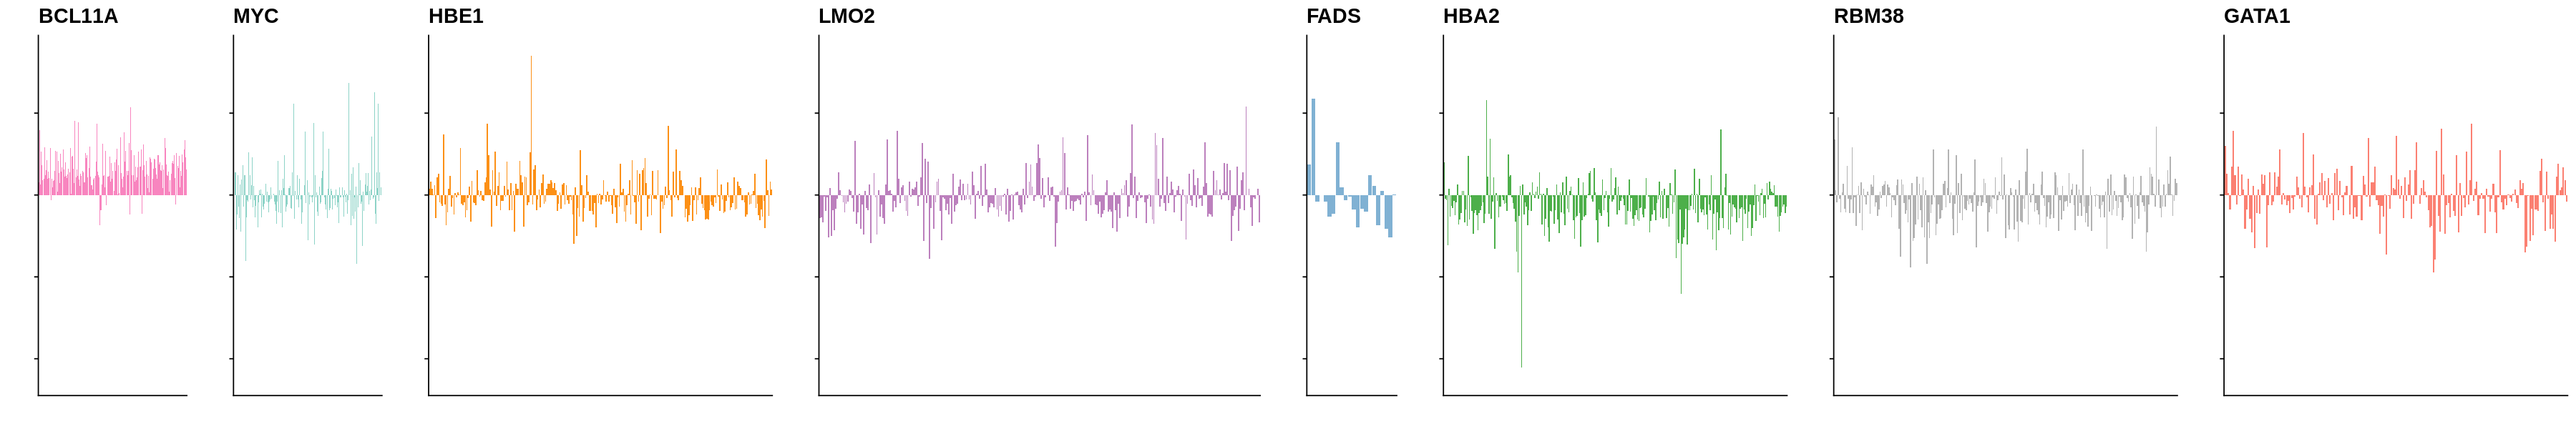

In [42]:
dat = dat_peak_log2fc
dat = dat %>% 
    dplyr::filter(Assay == "ASTARR") %>% 
    dplyr::mutate(Region = TMPRA_Gene)

lst = split(dat, dat$Region)
lst = lapply(gene, function(idx){
    dat = lst[[idx]]
    gpt = ggplot(dat, aes(x=Peak, y=Log2FC, fill=Region)) +
        geom_bar(stat = "identity") +
        labs(title=idx, x="", y="") +
        theme_cowplot() +
        theme_fill +
        theme_text +
        ylim(-4.5, 3.5)
})

options(repr.plot.height=5, repr.plot.width=30)
plot_grid(plotlist = lst, nrow=1, rel_widths = c(10, 10, 20, 25, 7, 20, 20, 20))

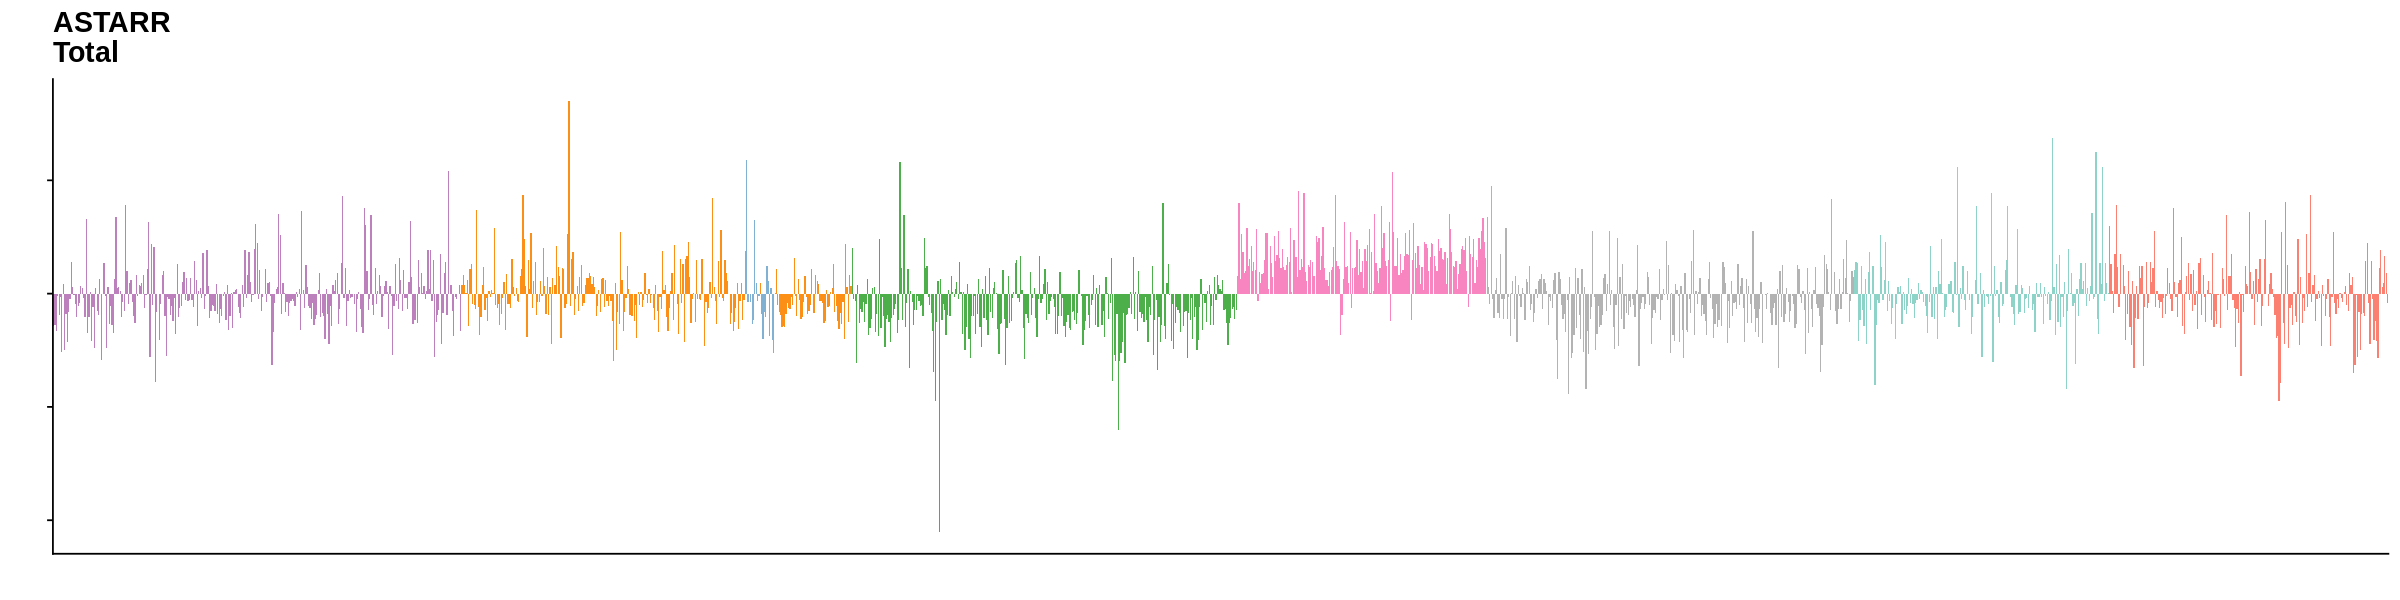

In [43]:
txt = paste0("ASTARR\n", "Total")
dat = dat_peak_log2fc
dat = dat %>% 
    dplyr::filter(Assay == "ASTARR") %>% 
    dplyr::mutate(Region = TMPRA_Gene)

gpt = ggplot(dat, aes(x=Peak, y=Log2FC, fill=Region)) +
    geom_bar(stat = "identity") +
    labs(title=txt, x="", y="") +
    theme_cowplot() +
    theme_fill +
    theme_text

options(repr.plot.height=5, repr.plot.width=20)
print(gpt)

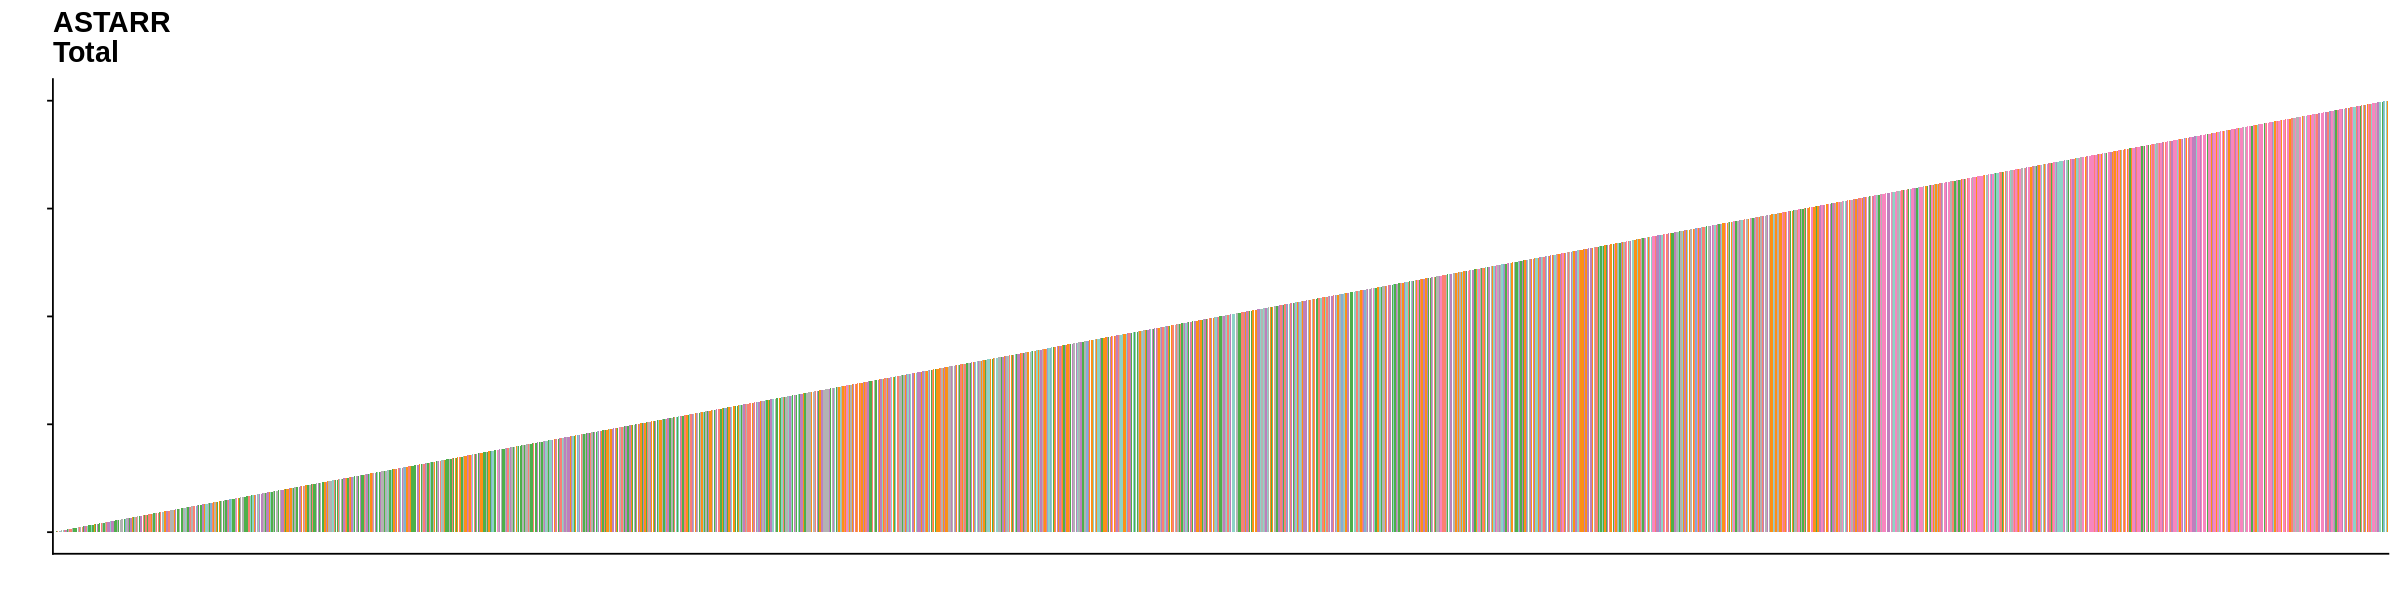

In [48]:
txt = paste0("ASTARR\n", "Total")
dat = dat_peak_log2fc
dat = dat %>% 
    dplyr::filter(Assay == "ASTARR") %>% 
    dplyr::arrange(Log2FC) %>%
    dplyr::mutate(
        Peak   = factor(Peak, levels=Peak),
        Region = TMPRA_Gene
    )

gpt = ggplot(dat, aes(x=Peak, y=RankNorm_Total, fill=Region)) +
    geom_bar(stat = "identity") +
    labs(title=txt, x="", y="") +
    theme_cowplot() +
    theme_fill +
    theme_text

options(repr.plot.height=5, repr.plot.width=20)
print(gpt)

## WSTARR

In [49]:
dat = dat_peak_log2fc
dat = dat %>% 
    dplyr::filter(Assay == "WSTARR") %>% 
    dplyr::mutate(Region = TMPRA_Gene)
print(range(dat$Log2FC))

[1] -1.393572  1.953786


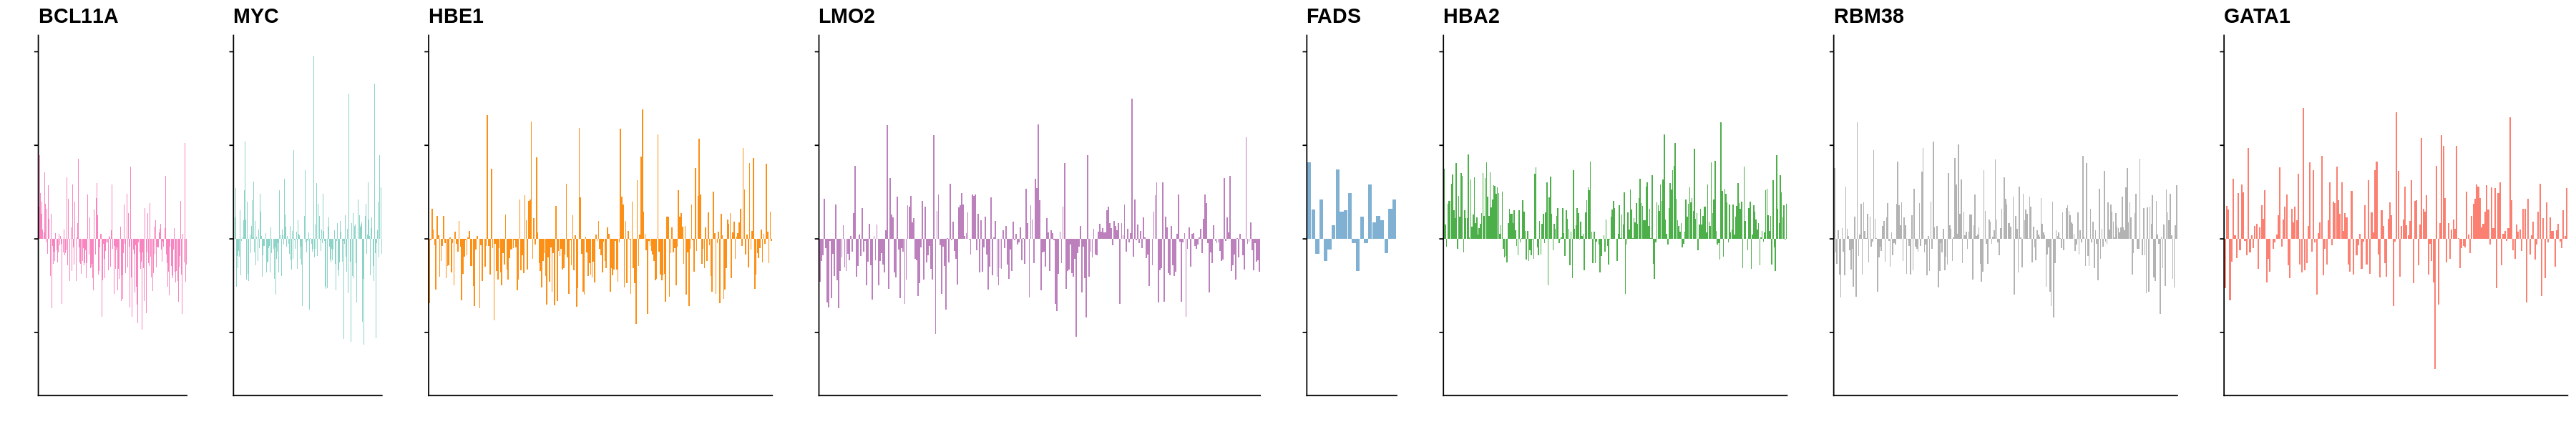

In [51]:
dat = dat_peak_log2fc
dat = dat %>% 
    dplyr::filter(Assay == "WSTARR") %>% 
    dplyr::mutate(Region = TMPRA_Gene)

lst = split(dat, dat$Region)
lst = lapply(gene, function(idx){
    dat = lst[[idx]]
    gpt = ggplot(dat, aes(x=Peak, y=Log2FC, fill=Region)) +
        geom_bar(stat = "identity") +
        labs(title=idx, x="", y="") +
        theme_cowplot() +
        theme_fill +
        theme_text +
        ylim(-1.5, 2.0)
})

options(repr.plot.height=5, repr.plot.width=30)
plot_grid(plotlist = lst, nrow=1, rel_widths = c(10, 10, 20, 25, 7, 20, 20, 20))

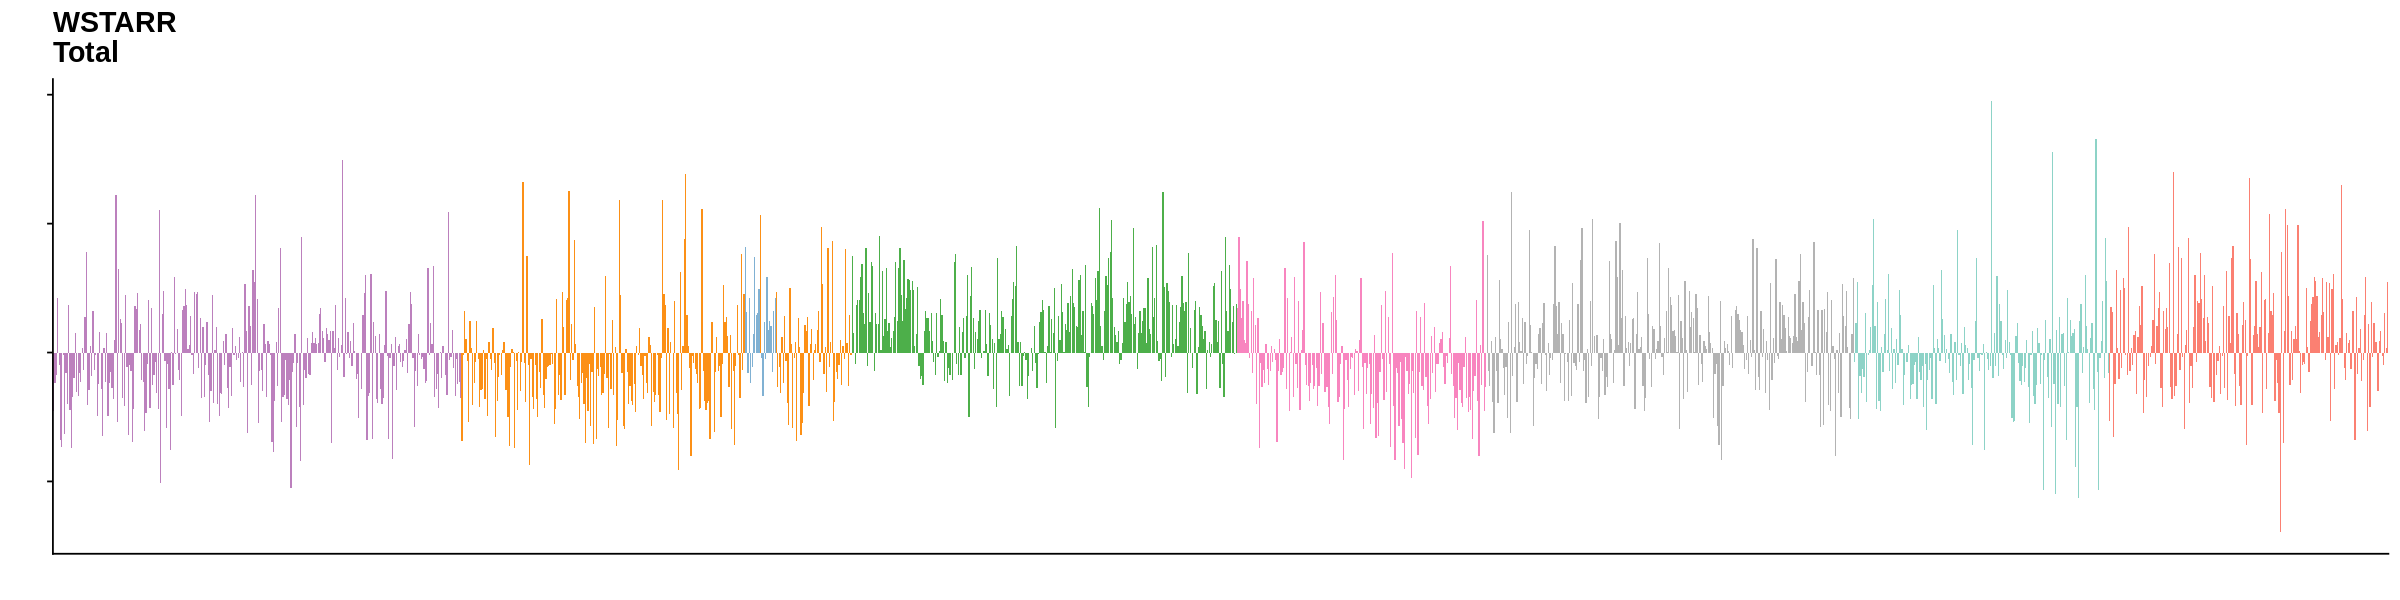

In [52]:
dat = dat_peak_log2fc
dat = dat %>% 
    dplyr::filter(Assay == "WSTARR") %>% 
    dplyr::mutate(Region = TMPRA_Gene)

txt = paste0("WSTARR\n", "Total")
gpt = ggplot(dat, aes(x=Peak, y=Log2FC, fill=Region)) +
    geom_bar(stat = "identity") +
    labs(title=txt, x="", y="") +
    theme_cowplot() +
    theme_fill +
    theme_text

options(repr.plot.height=5, repr.plot.width=20)
print(gpt)

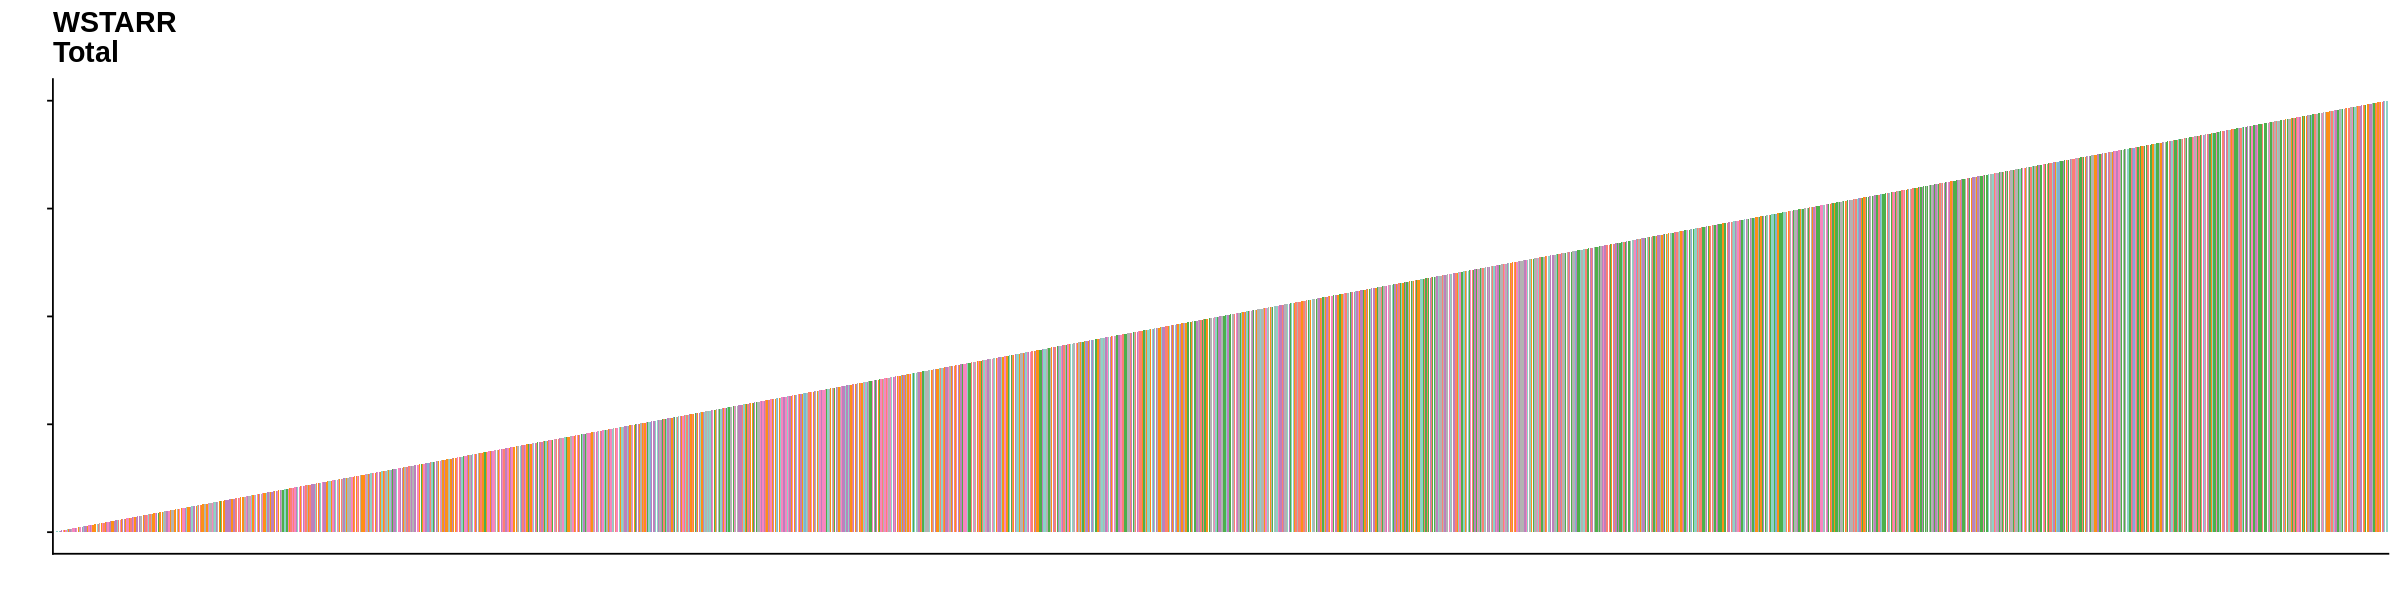

In [53]:
dat = dat_peak_log2fc
dat = dat %>% 
    dplyr::filter(Assay == "WSTARR") %>% 
    dplyr::arrange(Log2FC) %>%
    dplyr::mutate(
        Peak   = factor(Peak, levels=Peak),
        Region = TMPRA_Gene
    )

txt = paste0("WSTARR\n", "Total")
gpt = ggplot(dat, aes(x=Peak, y=RankNorm_Total, fill=Region)) +
    geom_bar(stat = "identity") +
    labs(title=txt, x="", y="") +
    theme_cowplot() +
    theme_fill +
    theme_text

options(repr.plot.height=5, repr.plot.width=20)
print(gpt)

## TMPRA

In [54]:
dat = dat_peak_log2fc
dat = dat %>% 
    dplyr::filter(Assay == "TMPRA") %>% 
    dplyr::mutate(Region = TMPRA_Gene)
print(range(dat$Log2FC))

[1] -2.439058  6.104344


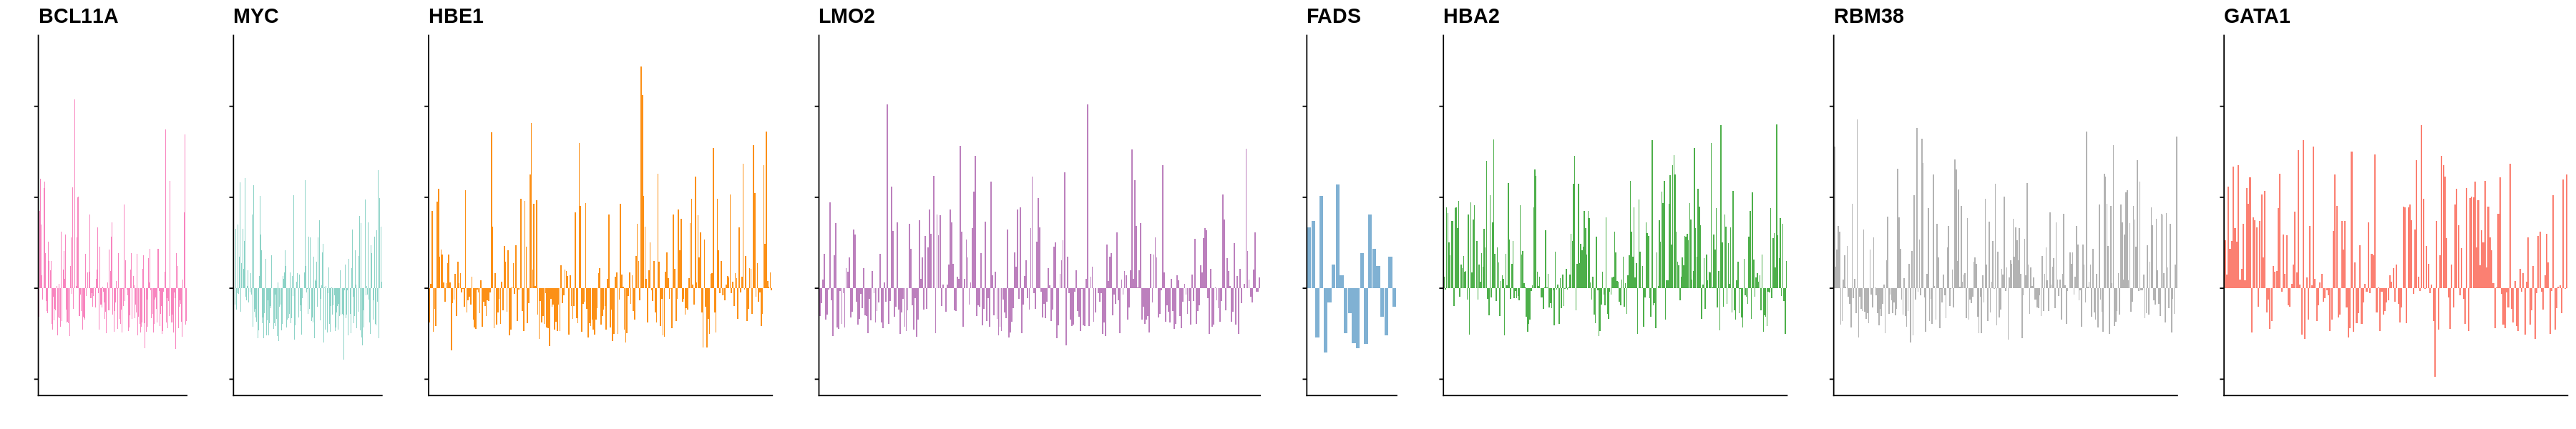

In [56]:
dat = dat_peak_log2fc
dat = dat %>% 
    dplyr::filter(Assay == "TMPRA") %>% 
    dplyr::mutate(Region = TMPRA_Gene)

lst = split(dat, dat$Region)
lst = lapply(gene, function(idx){
    dat = lst[[idx]]
    gpt = ggplot(dat, aes(x=Peak, y=Log2FC, fill=Region)) +
        geom_bar(stat = "identity") +
        labs(title=idx, x="", y="") +
        theme_cowplot() +
        theme_fill +
        theme_text +
        ylim(-2.5, 6.5)
})

options(repr.plot.height=5, repr.plot.width=30)
plot_grid(plotlist = lst, nrow=1, rel_widths = c(10, 10, 20, 25, 7, 20, 20, 20))

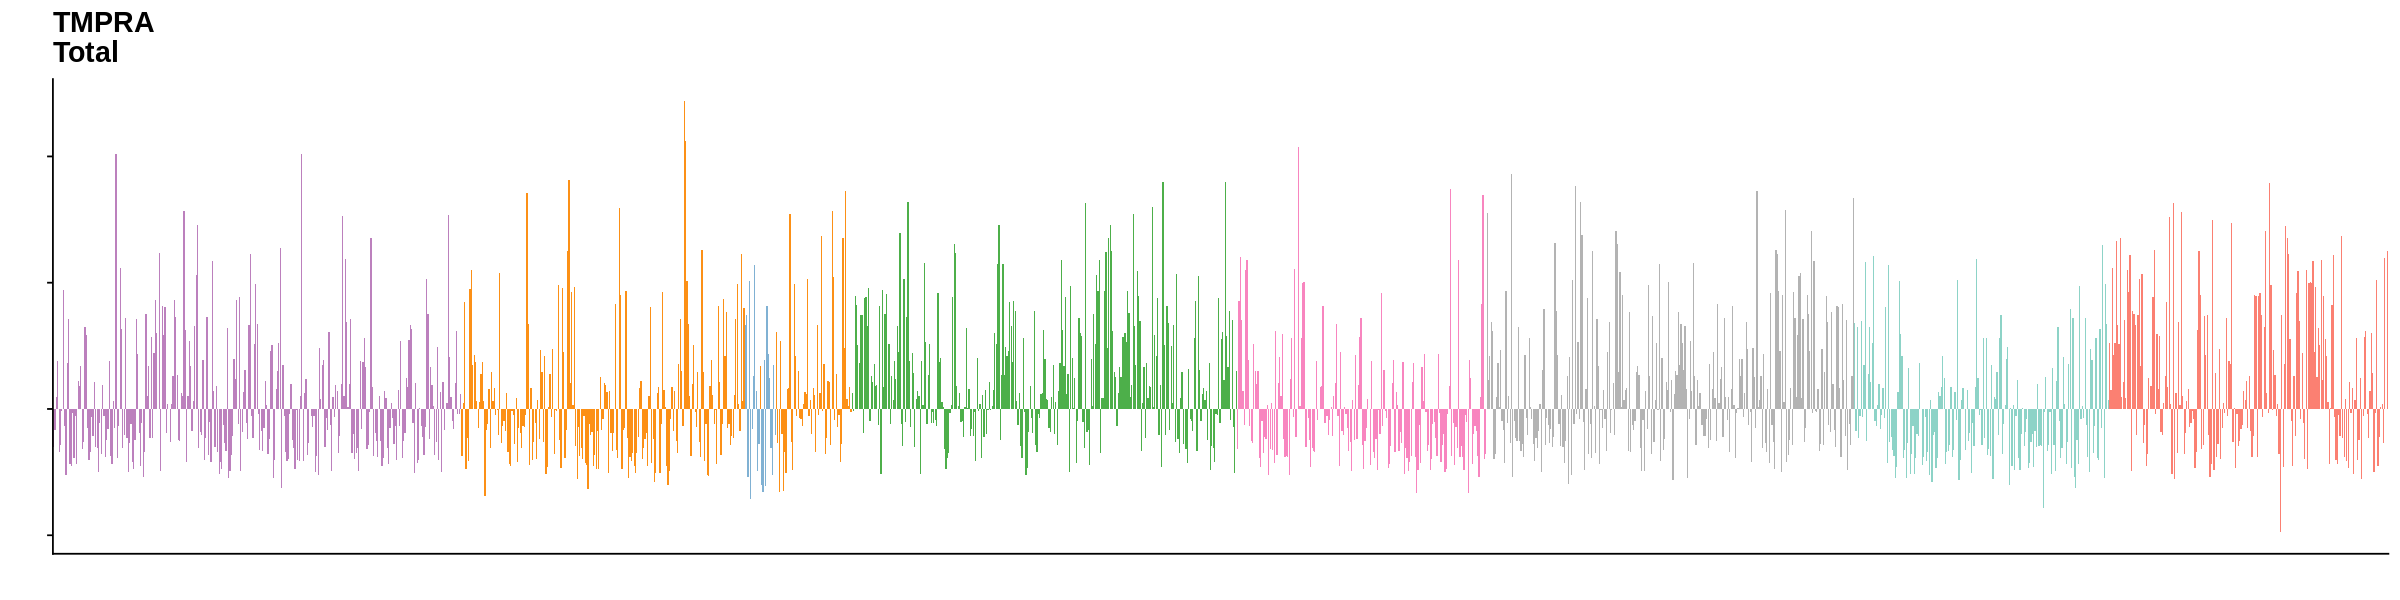

In [57]:
dat = dat_peak_log2fc
dat = dat %>% 
    dplyr::filter(Assay == "TMPRA") %>% 
    dplyr::mutate(Region = TMPRA_Gene)

txt = paste0("TMPRA\n", "Total")
gpt = ggplot(dat, aes(x=Peak, y=Log2FC, fill=Region)) +
    geom_bar(stat = "identity") +
    labs(title=txt, x="", y="") +
    theme_cowplot() +
    theme_fill +
    theme_text

options(repr.plot.height=5, repr.plot.width=20)
print(gpt)

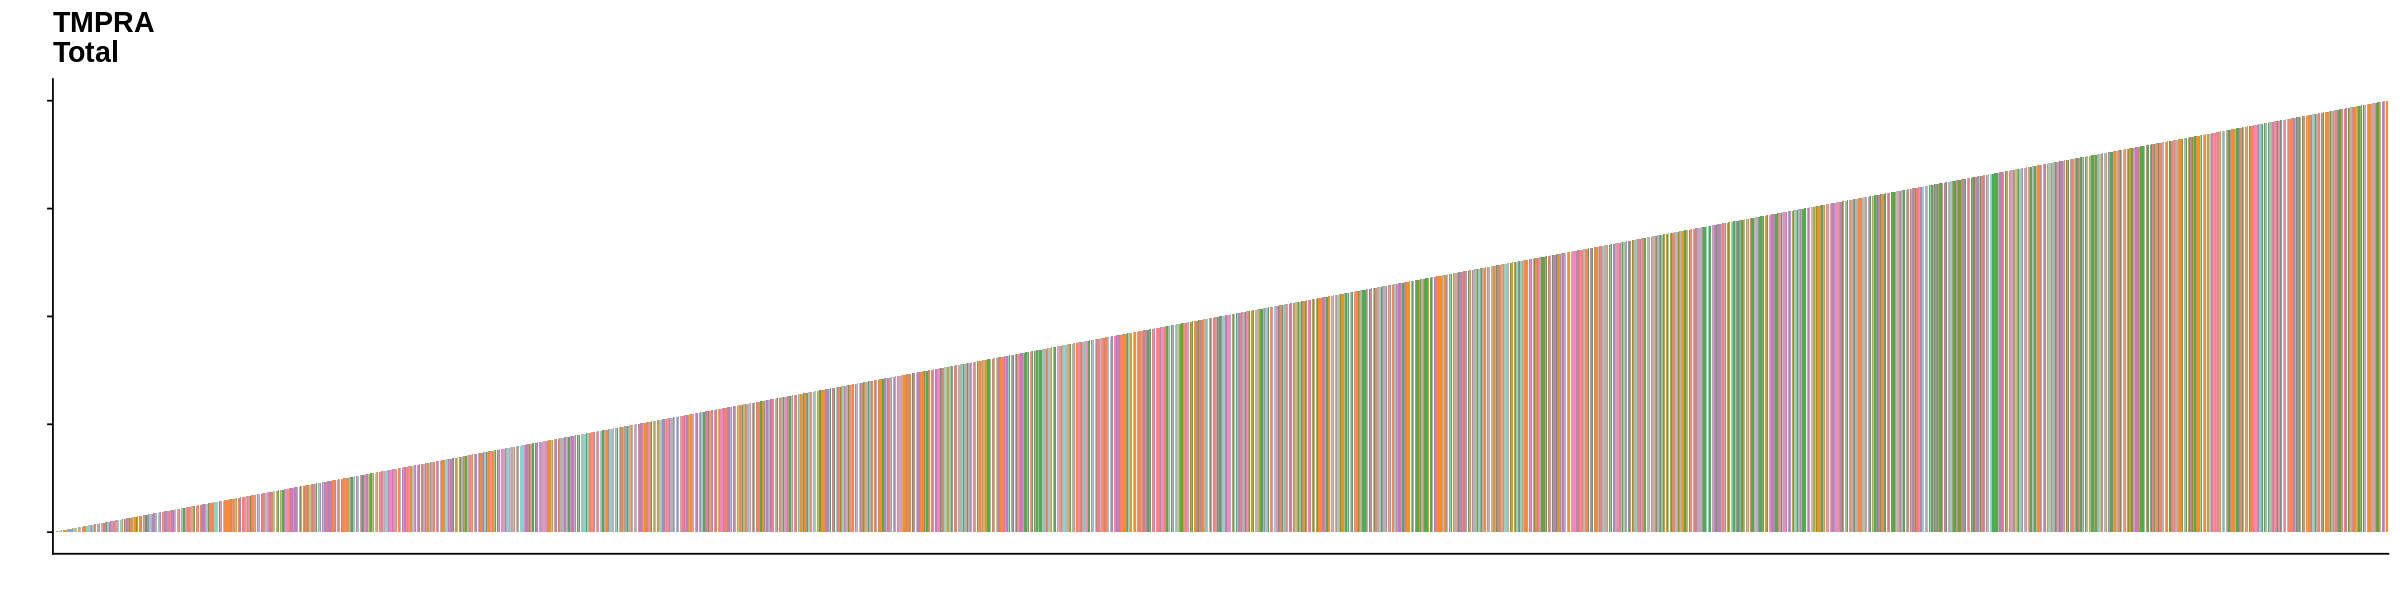

In [58]:
dat = dat_peak_log2fc
dat = dat %>% 
    dplyr::filter(Assay == "TMPRA") %>% 
    dplyr::arrange(Log2FC) %>%
    dplyr::mutate(
        Peak   = factor(Peak, levels=Peak),
        Region = TMPRA_Gene
    )

txt = paste0("TMPRA\n", "Total")
gpt = ggplot(dat, aes(x=Peak, y=RankNorm_Total, fill=Region)) +
    geom_bar(stat = "identity") +
    labs(title=txt, x="", y="") +
    theme_cowplot() +
    theme_fill +
    theme_text

options(repr.plot.height=5, repr.plot.width=20)
print(gpt)